# Stock Volatility Analysis

### 1. True Range: A Measure of Volatility
So, how do we quantify this 'heartbeat' or volatility? With the True Range. The True Range of a stock doesn't just look at the difference between the high and low prices for a day. It also considers the gap between the previous day's closing price and the current day's high or low.

This gives us a more holistic view of price movement. For instance, if a stock closed at $100 yesterday and opened at $110 today because of after-hours news, then dropped to $105 before closing, simply looking at today's high-low range would miss the bigger picture.



In [ ]:
data['High_Low'] = data['High'] - data['Low']
data['High_PrevClose'] = abs(data['High'] - data['Close'].shift())
data['Low_PrevClose'] = abs(data['Low'] - data['Close'].shift())
data['True_Range'] = data[['High_Low', 'High_PrevClose', 'Low_PrevClose']].max(axis=1)

The above code snippet calculates the True Range by considering three major factors: the difference between the day's high and low, the difference between the previous close and the current high, and the difference between the previous close and the current low.

### 2. The Exponential Moving Average (EMA)
Raw data can be noisy. If we plotted the daily True Range on a chart, it might look like an erratic line, making it hard to discern any meaningful pattern. That's where the Exponential Moving Average comes in. The EMA helps smooth out data to provide a clearer view of the trend. By giving more weight to recent data points, it reacts faster to price changes compared to a simple moving average.

    

```
n = 14
data['EMA_True_Range'] = data['True_Range'].ewm(span=n, adjust=False).mean()
```

In the code above, we calculate the 14-day EMA of the True Range. The EMA reacts faster to price changes compared to simple moving averages because it gives more weight to recent data points.

### 3. Diving Deeper: The Volatility Ratio
The Volatility Ratio gives us a comparative measure by dividing the True Range by its EMA. It essentially measures the magnitude of price changes in relation to its recent history. When there's a spike in the ratio, it can be an indicator of a significant shift in the stock's behavior.

```
data['Volatility_Ratio'] = data['True_Range'] / data['EMA_True_Range']
```

**When we witness a sharp rise in the Volatility Ratio, it doesn't inherently indicate the direction of the impending move. However, these spikes can be grouped into two main scenarios:**

- Continuation of Trend: If there's already an established trend in place, a heightened Volatility Ratio might hint that the ongoing trend is gaining even more momentum. For instance, during an uptrend, a spike in the ratio suggests that buyers are driving prices upwards with increasing vigor.
- Reversal of Trend: Alternatively, a pronounced Volatility Ratio could also hint at a potential trend reversal. Such reversals often coincide with shifts in market sentiment. For example, during a prolonged downtrend, a notable Volatility Ratio could signify a rapid plunge due to panic selling. Such drastic movements could deplete the selling momentum, setting the stage for a possible price reversal.

[*********************100%%**********************]  1 of 1 completed


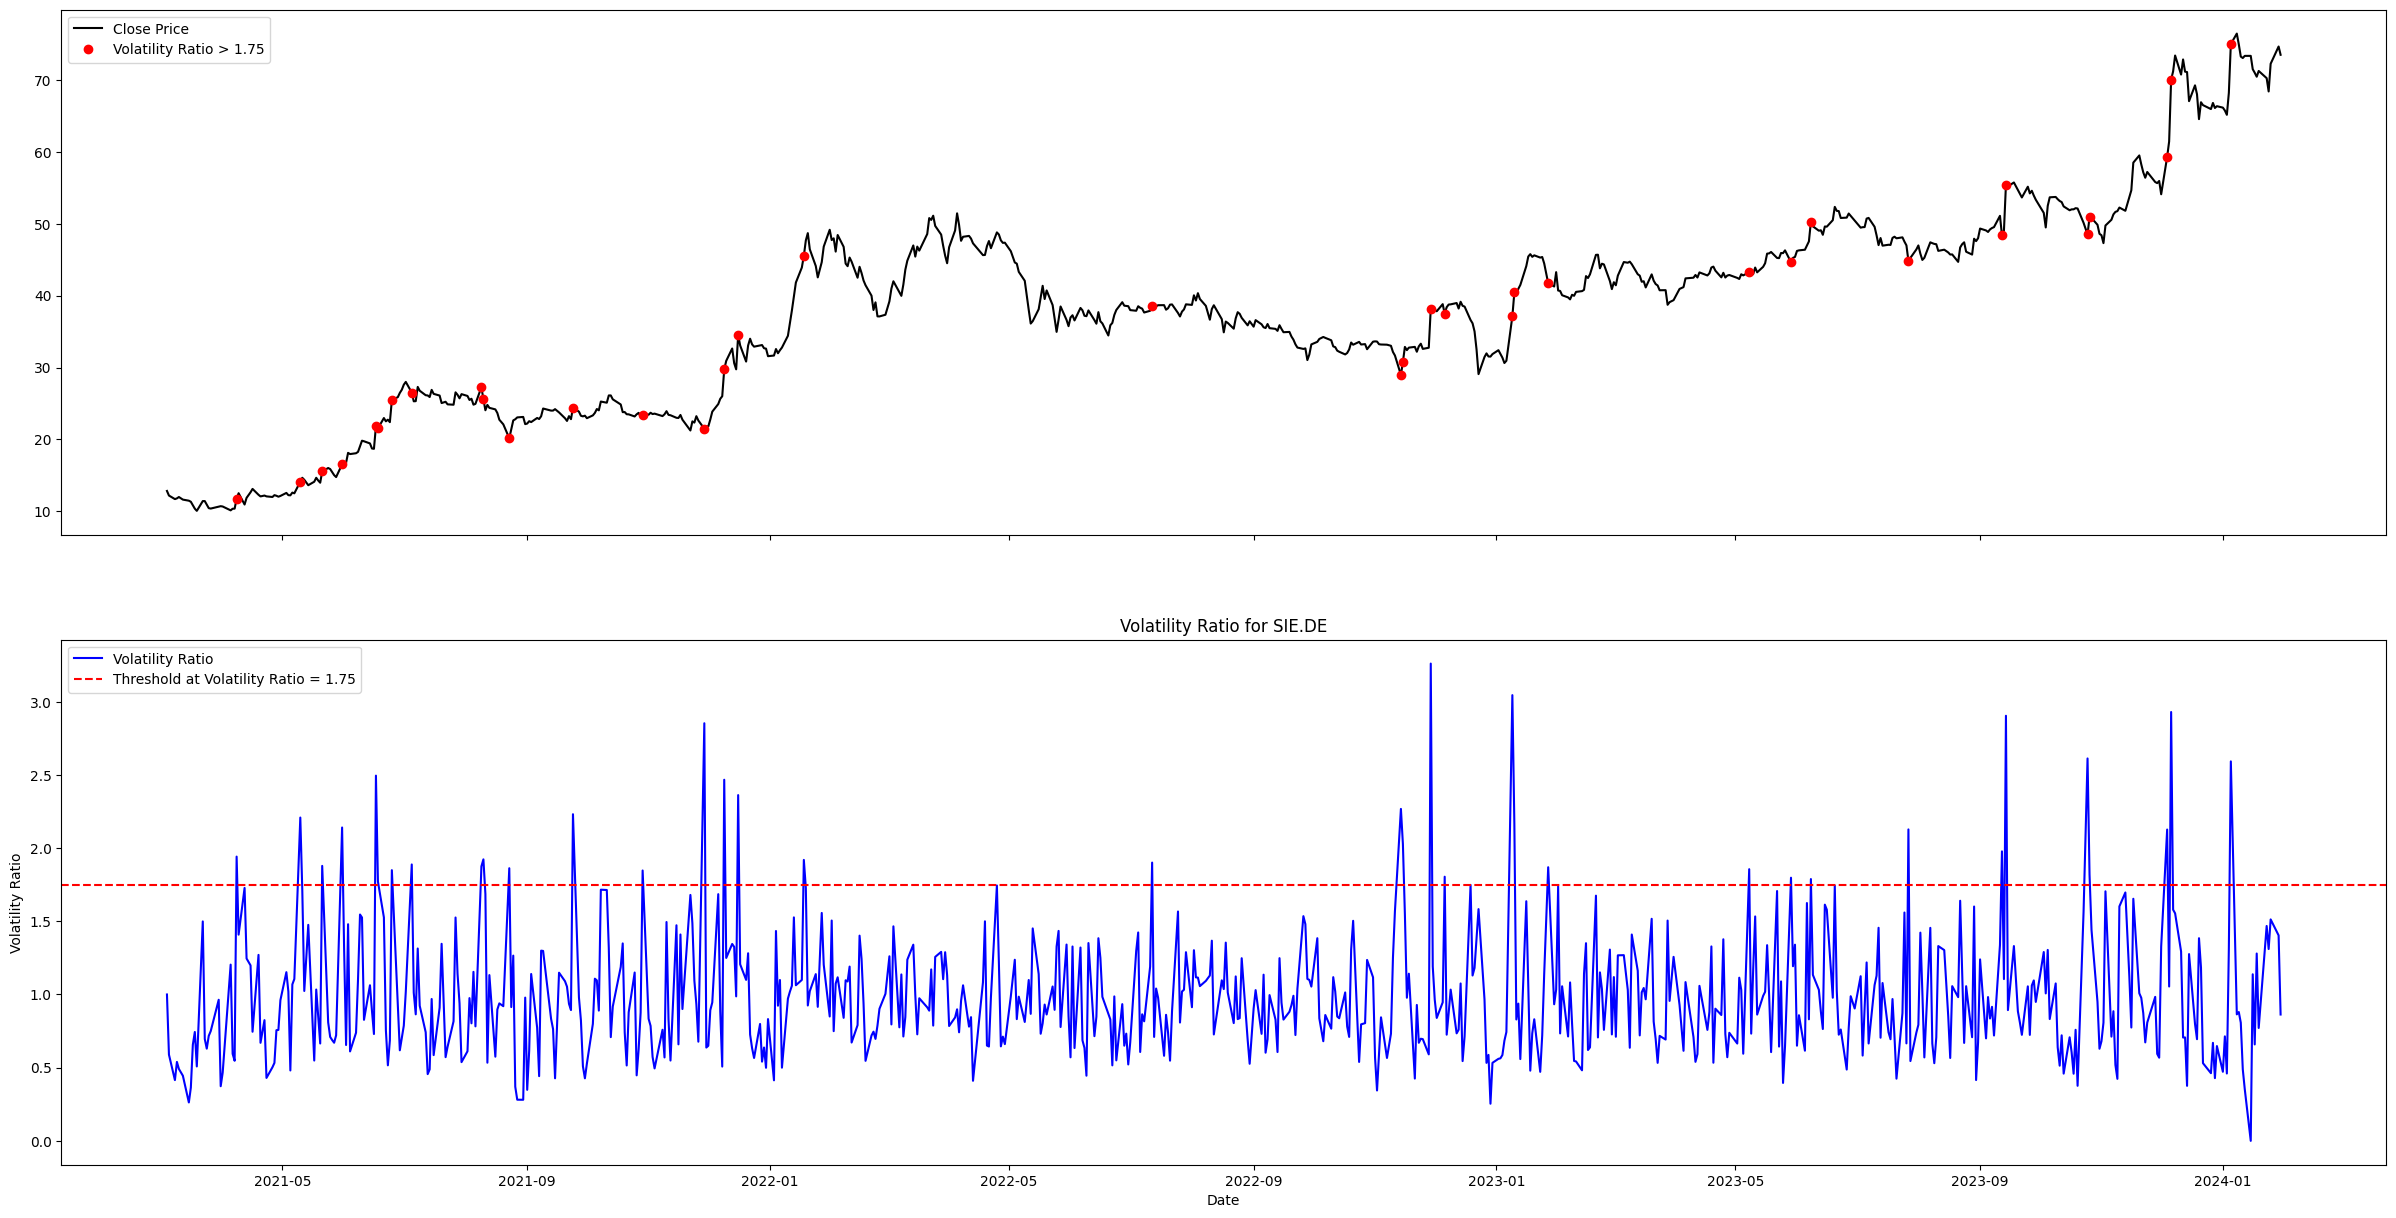

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Ticker
ticker = "BCLIND.NS"

# Download historical data
data = yf.download(ticker, start='2020-01-01', end='2024-01-31')

# Calculate True Range
data['High_Low'] = data['High'] - data['Low']
data['High_PrevClose'] = abs(data['High'] - data['Close'].shift())
data['Low_PrevClose'] = abs(data['Low'] - data['Close'].shift())
data['True_Range'] = data[['High_Low', 'High_PrevClose', 'Low_PrevClose']].max(axis=1)

# Calculate N-day EMA of True Range
n = 14
data['EMA_True_Range'] = data['True_Range'].ewm(span=n, adjust=False).mean()

# Calculate Volatility Ratio
data['Volatility_Ratio'] = data['True_Range'] / data['EMA_True_Range']

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(30, 15))

# Plot close price
ax1.plot(data.index, data['Close'], label='Close Price', color='black')
ratio = 1.75

# Mark points where Volatility Ratio is above ratio
above_1_5 = data['Volatility_Ratio'] > ratio
ax1.plot(data.index[above_1_5], data['Close'][above_1_5], 'ro', label=f'Volatility Ratio > {ratio}')
ax1.legend(loc='upper left')

# Plot Volatility Ratio
ax2.plot(data.index, data['Volatility_Ratio'], label='Volatility Ratio', color='blue')
ax2.axhline(y=ratio, color='red', linestyle='--', label=f'Threshold at Volatility Ratio = {ratio}')
ax2.set_title('Volatility Ratio for SIE.DE')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volatility Ratio')
ax2.legend(loc='upper left')

plt.show()
